### Imports

In [1]:
import os

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Getting data

In [2]:
workdir = os.getcwd() + "/data/"
training_path = workdir + "train.csv"
test_path = workdir + "test.csv"

In [3]:
df_train = pd.read_csv(training_path)
df_test = pd.read_csv(test_path)

### Data exploration

In [4]:
df_train.head(10).style.background_gradient()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458300,nan,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,nan,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,nan,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,nan,C


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


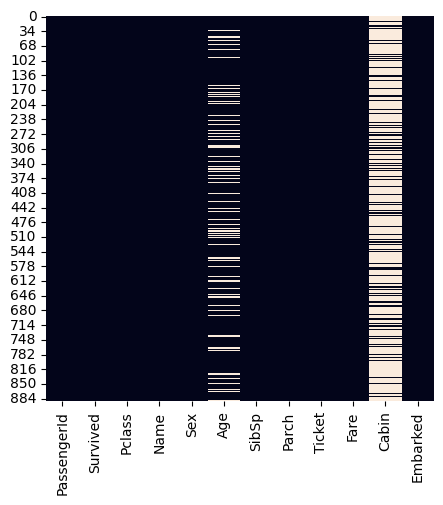

In [7]:
def plot_missing_data(dataset):
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(dataset.isnull(), cbar=False)

plot_missing_data(df_train)

In [8]:
df_train['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [9]:
df_train.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [10]:
df_train.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [11]:
df_train['Pclass'].value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

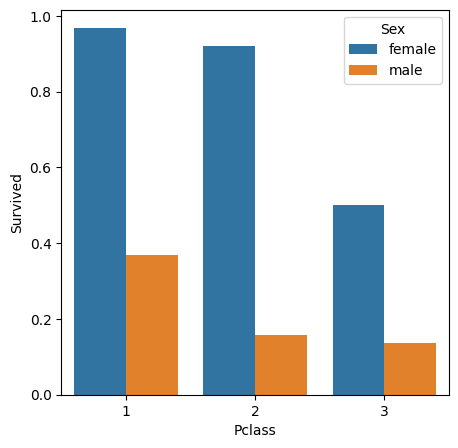

In [12]:
def bar_chart_compare(dataset, x_feature1, y_feature, x_feature2=None):
    plt.figure(figsize=[5,5])
    g = sns.barplot(x=x_feature1, y=y_feature, hue=x_feature2, errorbar=None, data=dataset) 
    
bar_chart_compare(dataset=df_train, x_feature1='Pclass', x_feature2='Sex', y_feature='Survived')

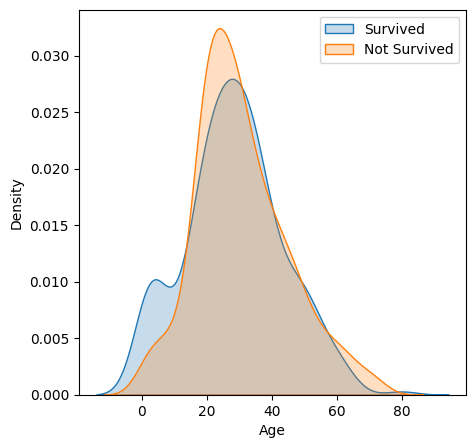

In [13]:
def plot_kernel_density(dataset, x_feature, y_feature):
    fig, ax = plt.subplots(figsize=(5,5))
    sns.kdeplot(dataset[x_feature].loc[dataset[y_feature] == 1], fill=True, ax=ax, label=y_feature).set_xlabel(x_feature)
    sns.kdeplot(dataset[x_feature].loc[dataset[y_feature] == 0], fill=True, ax=ax, label=f"Not {y_feature}")
    plt.legend()
plot_kernel_density(df_train, 'Age', 'Survived')

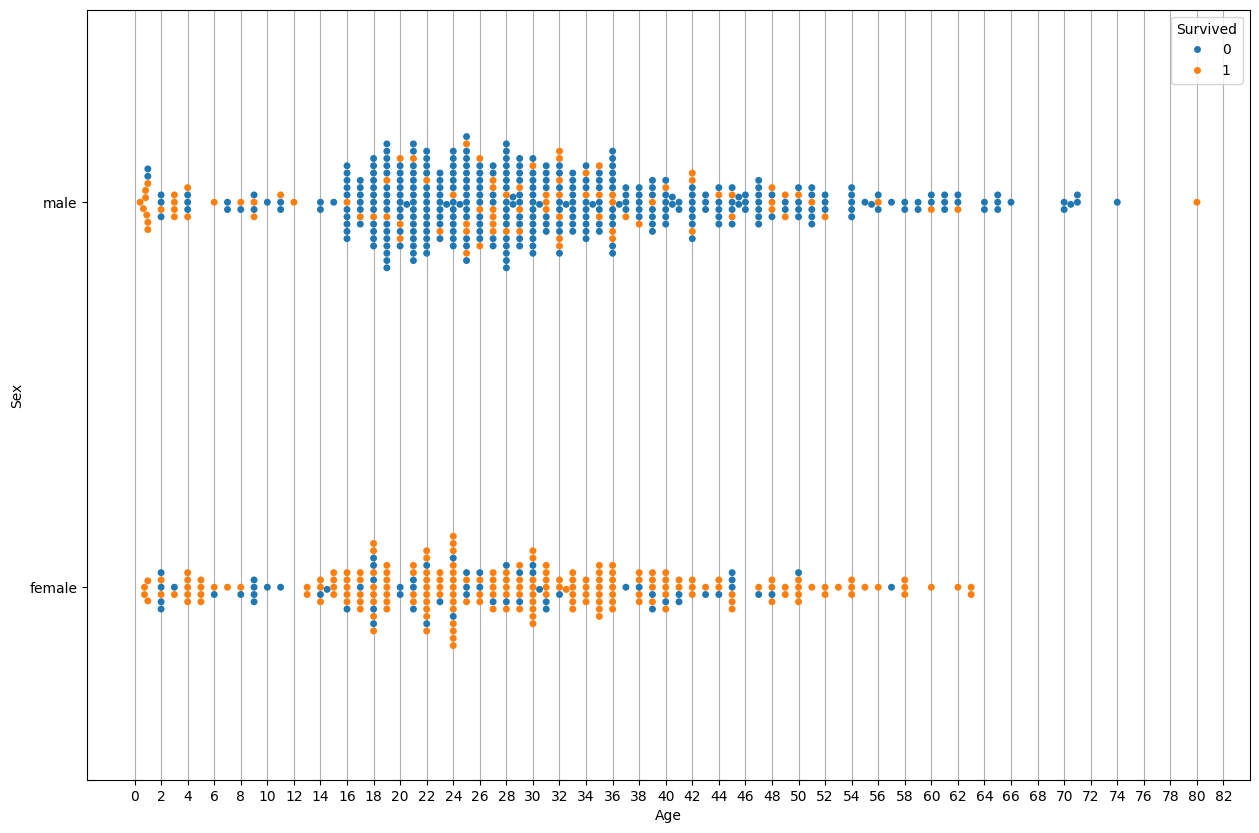

In [14]:
def plot_swarm(dataset, x_feature, y_feature, h_feature=None, size=5):
    fig, ax = plt.subplots(figsize=[15,10])
    plt.xticks(list(range(0, 100, 2)))
    ax.grid(True)
    sns.swarmplot(data=dataset, x=x_feature, y=y_feature, hue=h_feature, s=size)
plot_swarm(dataset=df_train, x_feature='Age', y_feature='Sex', h_feature='Survived')

In [15]:
df_train['Age_decades'] = (df_train['Age']/10).fillna(0).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_decades
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [16]:
df_train.groupby('Age_decades').Survived.mean()

Age_decades
0    0.376569
1    0.401961
2    0.350000
3    0.437126
4    0.382022
5    0.416667
6    0.315789
7    0.000000
8    1.000000
Name: Survived, dtype: float64

In [17]:
df_train.groupby('SibSp').Survived.mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [18]:
df_train.groupby('Parch').Survived.mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [19]:
df_train.groupby('Embarked').Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

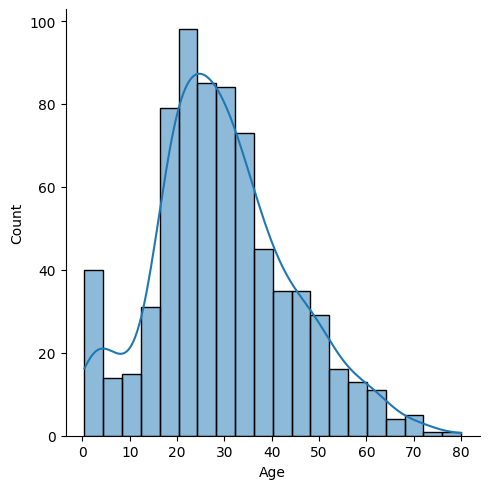

In [20]:
sns.displot(df_train['Age'], bins=20, kde=True)

In [21]:
 df_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

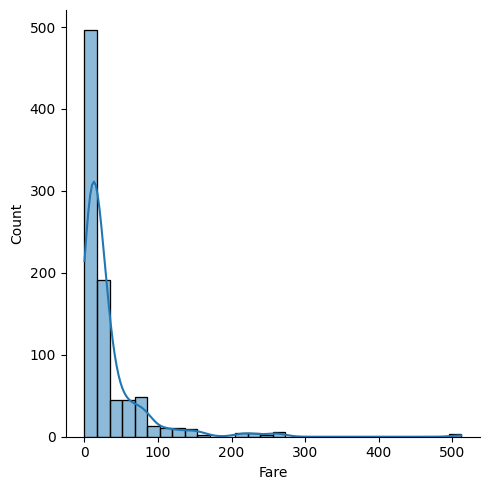

In [22]:
sns.displot(df_train['Fare'], bins=30, kde=True)

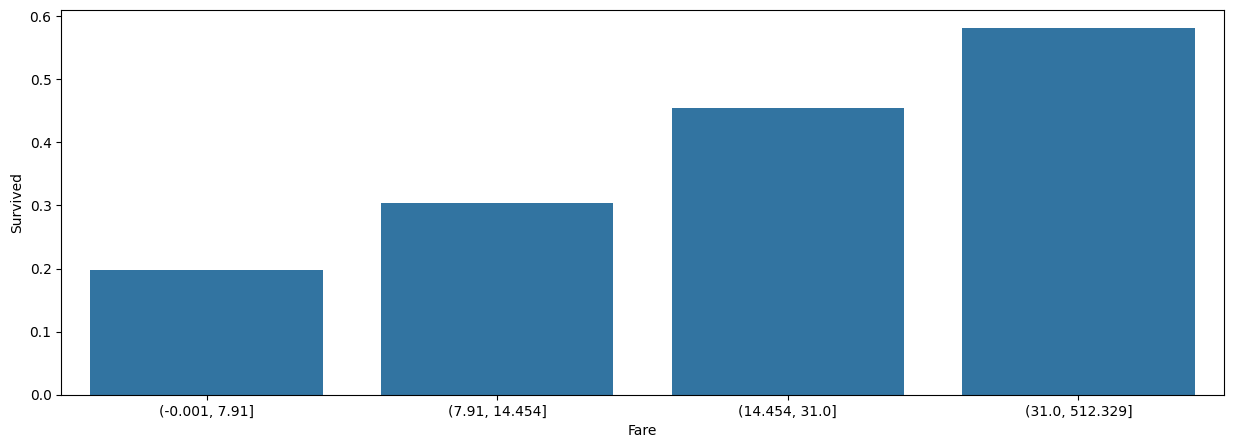

In [23]:
def binning(dataset, x_feature, y_feature):
    fig, ax = plt.subplots(figsize=[15,5])
    quartiles = pd.qcut(dataset[x_feature], 4)
    sns.barplot(x=quartiles, y=dataset[y_feature], errorbar=None)
binning(df_train, 'Fare', 'Survived')

In [24]:
df_train.groupby(['Embarked', 'Pclass', 'Sex']).Survived.mean().to_frame()

Survived
Embarked Pclass Sex             
C        1      female  0.976744
                male    0.404762
         2      female  1.000000
                male    0.200000
         3      female  0.652174
                male    0.232558
Q        1      female  1.000000
                male    0.000000
         2      female  1.000000
                male    0.000000
         3      female  0.727273
                male    0.076923
S        1      female  0.958333
                male    0.354430
         2      female  0.910448
                male    0.154639
         3      female  0.375000
                male    0.128302

<Axes: xlabel='SibSp', ylabel='Survived'>

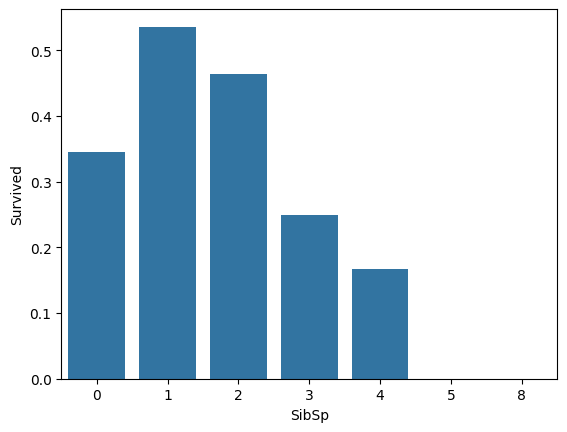

In [25]:
sns.barplot(x=df_train['SibSp'], y=df_train['Survived'], errorbar=None)

<Axes: xlabel='Parch', ylabel='Survived'>

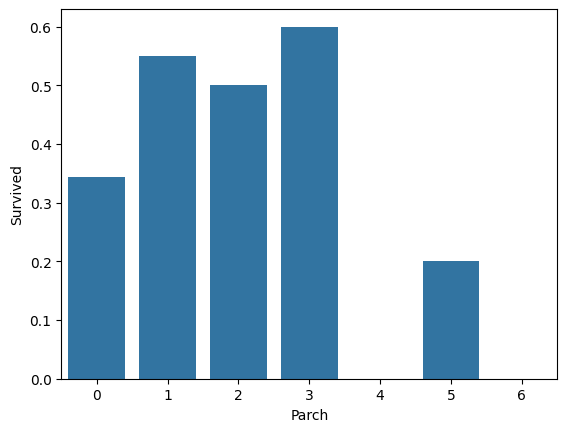

In [26]:
sns.barplot(x=df_train['Parch'], y=df_train['Survived'], errorbar=None)

### Feature Engineering

In [31]:
df_train['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [34]:
df_train['Title'] = df_train['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip())
df_test['Title'] = df_test['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip())

In [55]:
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [56]:
df_train.groupby('Title').PassengerId.count()

Title
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
Name: PassengerId, dtype: int64

<Axes: xlabel='Title'>

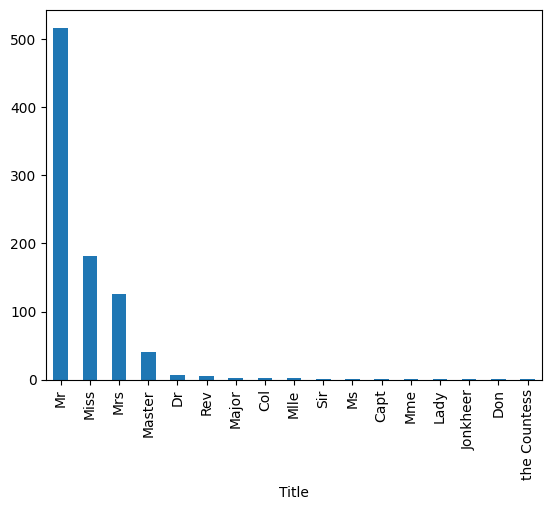

In [57]:
df_train.groupby('Title').PassengerId.count().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Title'>

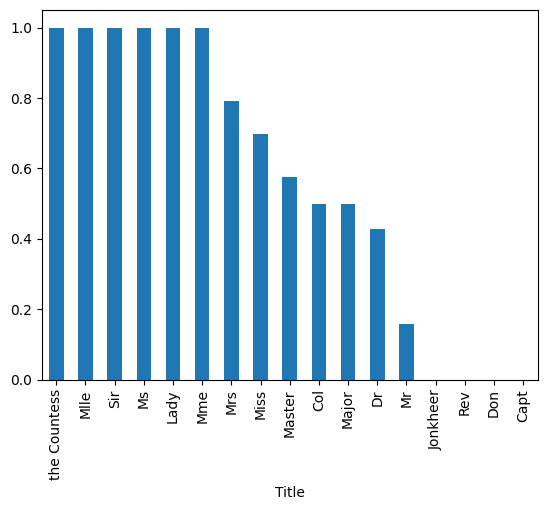

In [58]:
df_train.groupby('Title').Survived.mean().sort_values(ascending=False).plot(kind='bar')

In [59]:
df_train['FamSize'] = 1 + df_train['SibSp'] + df_train['Parch']
df_test['FamSize'] = 1 + df_test['SibSp'] + df_test['Parch']

<Axes: xlabel='FamSize'>

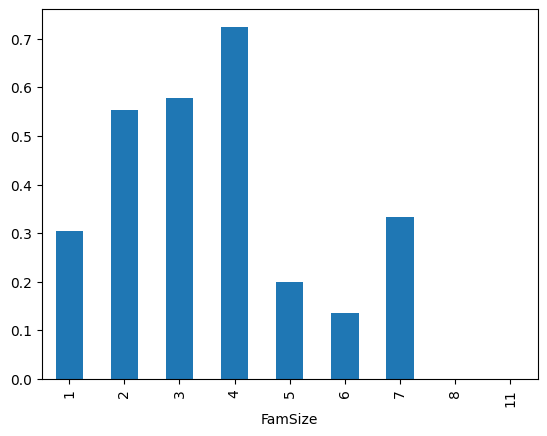

In [61]:
df_train.groupby('FamSize').Survived.mean().plot(kind='bar')

In [65]:
df_train['FamType'] = pd.cut(x=df_train['FamSize'], bins=[0,1,4,7,11], labels=["Solo", "Small", "Big", "Very big"])
df_test['FamType'] = pd.cut(x=df_train['FamSize'], bins=[0,1,4,7,11], labels=["Solo", "Small", "Big", "Very big"])

C:\Users\mrozmus\AppData\Local\Temp\ipykernel_15796\2120907476.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train.groupby('FamType').Survived.mean().plot(kind='bar')


<Axes: xlabel='FamType'>

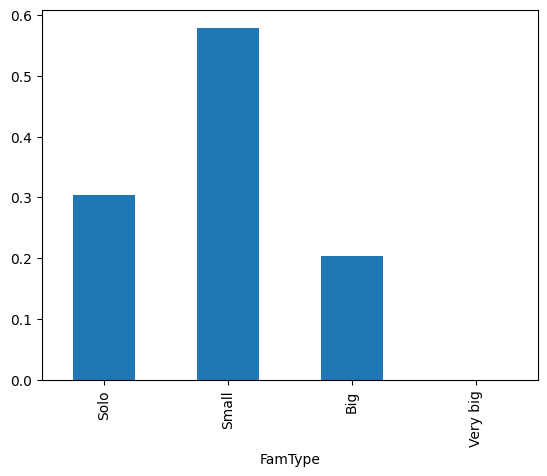

In [64]:
df_train.groupby('FamType').Survived.mean().plot(kind='bar')